<a href="https://colab.research.google.com/github/badrinarayanan02/machine_learning/blob/main/Component_2(2348507).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You work as a data analyst for a global nonprofit organization focused on improving well-being
and happiness worldwide. Your organization aims to understand the factors that contribute to
happiness in different countries and regions. To achieve this, you&#39;ve been given access to the
Kaggle World Happiness Report Dataset. Your task is to perform data preprocessing and
exploratory data analysis to uncover insights that can guide your organization&#39;s initiatives.

Importing necessary packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [3]:
happy_data = pd.read_csv('/content/2015.csv')

In [4]:
happy_data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
happy_data.shape

(158, 12)

In [6]:
happy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

<Axes: >

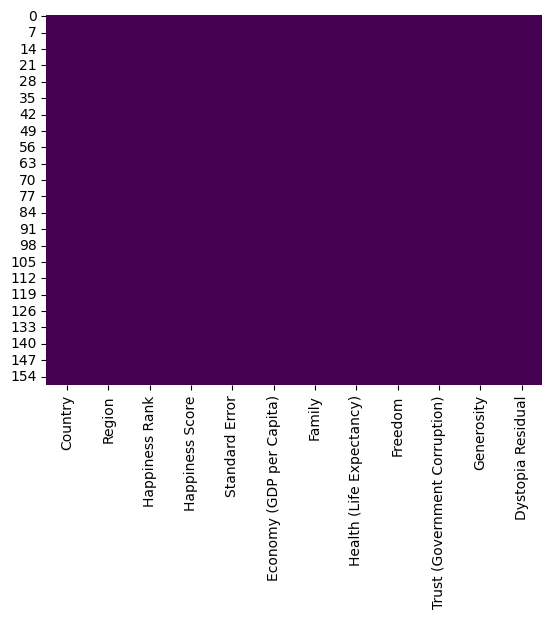

In [7]:
sns.set_style = 'whitegrid'
sns.heatmap(happy_data.isnull(),cmap='viridis',cbar=False)

In [8]:
[features for features in happy_data.columns if happy_data[features].isnull().sum()>0]

[]

Observation : There is no missing values in the dataset

In [ ]:
happy_data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Create bins for the happiness Score column to categorize countries into Low Happiness, Medium Happiness and High Happiness groups.

In [22]:
bin_edges = [0,4,6,10]
bin_labels = ['Low Happiness','Medium Happiness','High Happiness']
happy_data['Happiness Group'] = pd.cut(happy_data['Happiness Score'], bins=bin_edges,labels=bin_labels, include_lowest=True)
happy_data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Group
0,Switzerland,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,High Happiness
1,Iceland,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,High Happiness
2,Denmark,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,High Happiness
3,Norway,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,High Happiness
4,Canada,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,High Happiness
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,Low Happiness
154,Benin,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,Low Happiness
155,Syria,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,Low Happiness
156,Burundi,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,Low Happiness


Perform one-hot encoding on the Region column to convert it into numerical values

In [16]:
region_encoded = pd.get_dummies(happy_data['Region'],drop_first=True)
region_encoded

,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
153,0,0,0,0,0,0,0,1,0
154,0,0,0,0,0,0,0,1,0
155,0,0,0,1,0,0,0,0,0
156,0,0,0,0,0,0,0,1,0


In [20]:
happy_data['Region'].value_counts()

8    40
1    29
3    22
9    21
4    20
6     9
7     7
2     6
5     2
0     2
Name: Region, dtype: int64

Performing Visualization

In [23]:
country_name = happy_data['Country'].value_counts().index

In [25]:
country_value = happy_data['Country'].value_counts().values

([<matplotlib.patches.Wedge at 0x7c88d1967eb0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Switzerland'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Bangladesh'),
  Text(0.5500001486524352, -0.9526278583383436, 'Greece')])

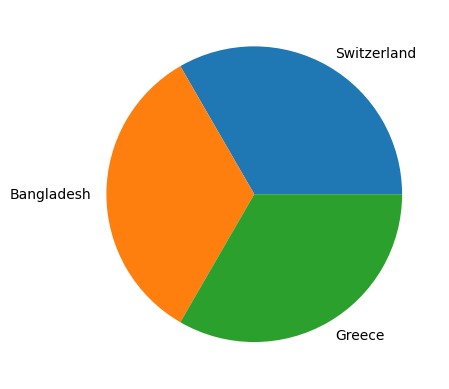

In [26]:
plt.pie(country_value[:3],labels=country_name[:3])

  Observations : Top countries in the datasets are Switzerland, Bangladesh, Greece

Covariance matrix for a subset of numerical columns in the dataset

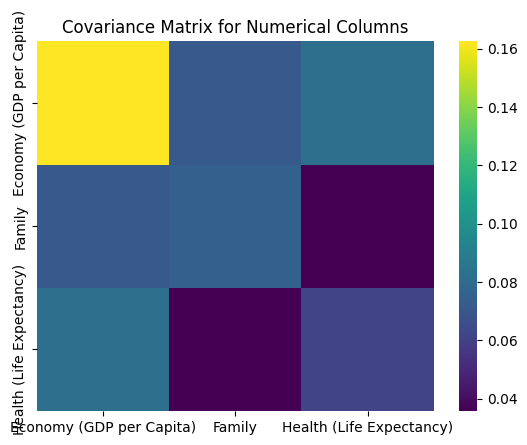

In [38]:
columns = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)']
df_subset = happy_data[columns]

cov_matrix = df_subset.cov()

sns.heatmap(cov_matrix, cmap='viridis')
plt.title('Covariance Matrix for Numerical Columns')
plt.show()


You want to test if there is a significant association between the Region and Happiness Rank columns. Perform a chi-square test and interpret the results.



In [30]:
import pandas as pd
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(happy_data['Region'], happy_data['Happiness Rank'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

significance_level = 0.05

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table: ", expected)

if p < significance_level:
    print("There is a significant association between Region and 'Happiness Rank'.")
else:
    print("There is no significant association between Region and 'Happiness Rank'.")


Chi-square statistic: 1415.3258620689655
P-value: 0.4107040079831256
Degrees of freedom: 1404
Expected frequencies table:  [[0.01265823 0.01265823 0.01265823 ... 0.01265823 0.01265823 0.01265823]
 [0.1835443  0.1835443  0.1835443  ... 0.1835443  0.1835443  0.1835443 ]
 [0.03797468 0.03797468 0.03797468 ... 0.03797468 0.03797468 0.03797468]
 ...
 [0.0443038  0.0443038  0.0443038  ... 0.0443038  0.0443038  0.0443038 ]
 [0.25316456 0.25316456 0.25316456 ... 0.25316456 0.25316456 0.25316456]
 [0.13291139 0.13291139 0.13291139 ... 0.13291139 0.13291139 0.13291139]]
There is no significant association between 'Region' and 'Happiness Rank'.


Bar chart to show the count of countries in each Happiness Score
group

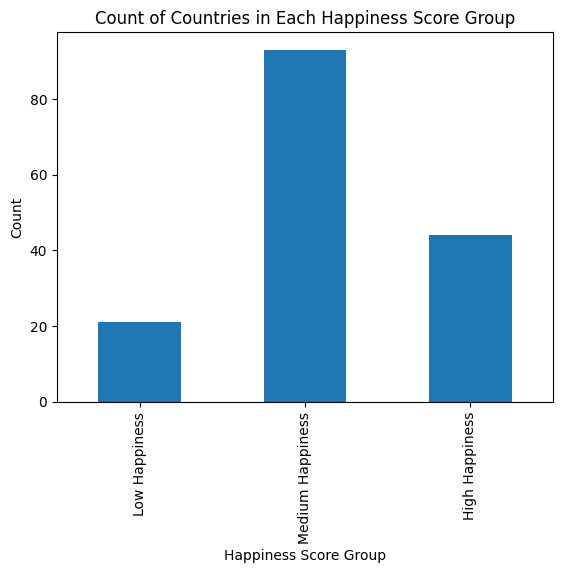

In [37]:
happy_data['Happiness Group'].value_counts().sort_index().plot(kind='bar')
plt.title('Count of Countries in Each Happiness Score Group')
plt.xlabel('Happiness Score Group')
plt.ylabel('Count')
plt.show()